In [1]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', 
                                 download=True, 
                                 train=True, 
                                 transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=64, 
                                          shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', 
                                download=True, 
                                train=False, 
                                transform=transform)
testloader = torch.utils.data.DataLoader(testset, 
                                         batch_size=64, 
                                         shuffle=True)


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



In [2]:
# helper function to print one of the images.
import matplotlib.pyplot as plt
import numpy as np

def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


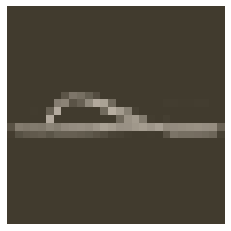

In [3]:
# print one image
image, label = next(iter(trainloader))
imshow(image[0,:]);

In [4]:
# Defining the Network Architecture
# As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. 

from torch import nn

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

In [7]:
# Define the optimizer
from torch import optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),
                      lr=0.003)

In [8]:
# Make a forward pass through the network to get the logits
# Use the logits to calculate the loss
# Perform a backward pass through the network with loss.backward() to calculate the gradients
# Take a step with the optimizer to update the weights
# stop when the loss drops below 0.4

epoch = 1
while True:
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    training_loss = running_loss/len(trainloader)
    print("Epoch, Loss:    {:2}, {:1.3}".format(epoch, training_loss))
    epoch += 1
    
    if training_loss < 0.4:
        break


Epoch, Loss:     1, 1.6
Epoch, Loss:     2, 0.811
Epoch, Loss:     3, 0.661
Epoch, Loss:     4, 0.6
Epoch, Loss:     5, 0.561
Epoch, Loss:     6, 0.532
Epoch, Loss:     7, 0.509
Epoch, Loss:     8, 0.492
Epoch, Loss:     9, 0.478
Epoch, Loss:    10, 0.466
Epoch, Loss:    11, 0.456
Epoch, Loss:    12, 0.447
Epoch, Loss:    13, 0.439
Epoch, Loss:    14, 0.432
Epoch, Loss:    15, 0.425
Epoch, Loss:    16, 0.419
Epoch, Loss:    17, 0.414
Epoch, Loss:    18, 0.409
Epoch, Loss:    19, 0.404
Epoch, Loss:    20, 0.4


In [9]:
# create helper function for printing
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps):
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(['T-shirt/top',
                        'Trouser',
                        'Pullover',
                        'Dress',
                        'Coat',
                        'Sandal',
                        'Shirt',
                        'Sneaker',
                        'Bag',
                        'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

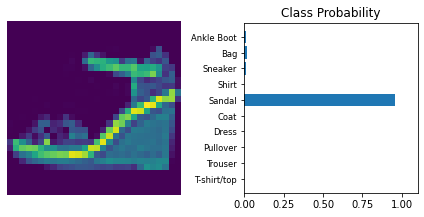

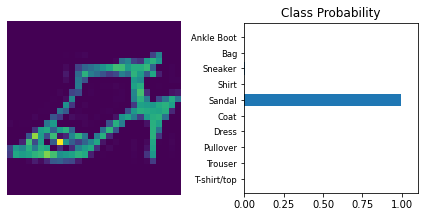

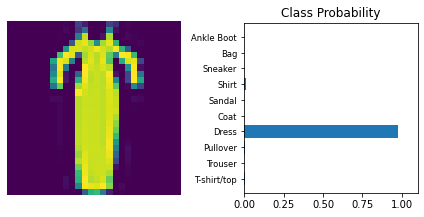

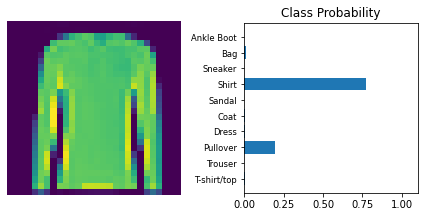

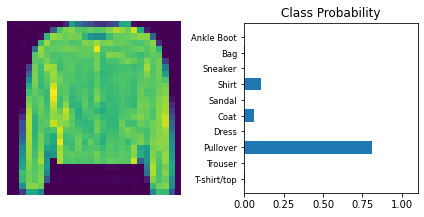

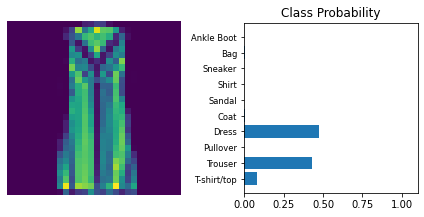

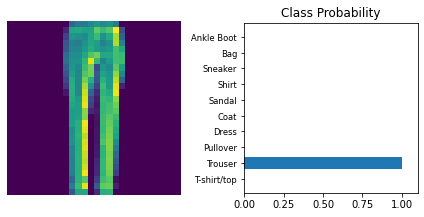

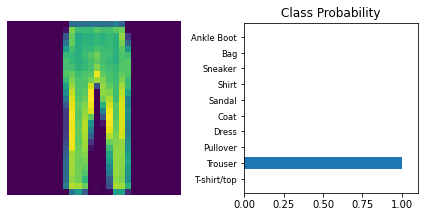

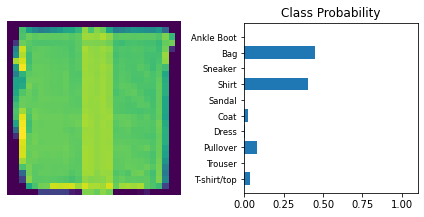

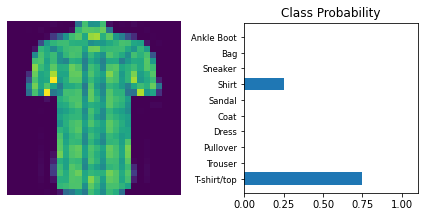

In [10]:
# print one image for each class and plot the class probability as classification
dataiter = iter(testloader)
for _ in range(10):
    images, labels = dataiter.next()
    img = images[0]

    # Convert 2D image to 1D vector
    img = img.resize_(1, 784)

    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)
    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)

    # Plot the image and probabilities
    view_classify(img.resize_(1, 28, 28), ps)